## 2.Carefully explain the differences between the KNN classifier and KNN regression methods.

KNN Classifier is used to classify data points into discreate classes while KNN Regression is used for predicting the continuous values.
KNN Classifier assign class labels based on the majority class of K nearest neighbors, while KNN Regression predicts the average of the target values of the K nearest neighbors.


# 9 Question Answer

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import datasets
from statsmodels.stats.api import anova_lm 
import seaborn as sns

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')


In [15]:
Auto=pd.read_csv("C:/Users/nihar/OneDrive/Desktop/Predictive Modeling/Data Sets/Auto.data", delim_whitespace=True, na_values = [" "])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [16]:
Auto.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [17]:
Auto['cylinders']=Auto['cylinders'].astype('object')
Auto['cylinders']

0      8
1      8
2      8
3      8
4      8
      ..
392    4
393    4
394    4
395    4
396    4
Name: cylinders, Length: 397, dtype: object

## 9(a)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='displacement'>,
        <Axes: xlabel='year', ylabel='displacement'>,
        <Axes: xlabel='origin', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='acceleration', ylabel='weight'>,
        <Axes: xlabel='year', ylabel='weight'>,
        <Axes: xlabel='origin', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='acceleration'>,
     

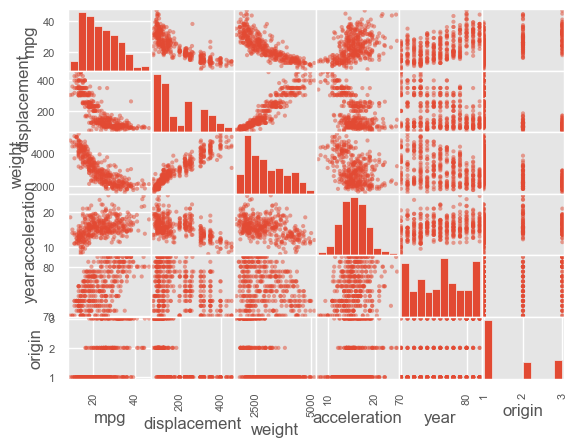

In [18]:
pd.plotting.scatter_matrix(Auto)

## 9(b)

In [19]:
Auto.corr(numeric_only='True')

,mpg,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.804443,-0.831739,0.422297,0.581469,0.563698
displacement,-0.804443,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [20]:
Auto.corr()

C:\Users\nihar\AppData\Local\Temp\ipykernel_34764\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.804443,-0.831739,0.422297,0.581469,0.563698
displacement,-0.804443,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.610664,-0.581265,0.210084,0.184314,1.000000


C:\Users\nihar\AppData\Local\Temp\ipykernel_34764\2092913849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Auto.corr().abs()


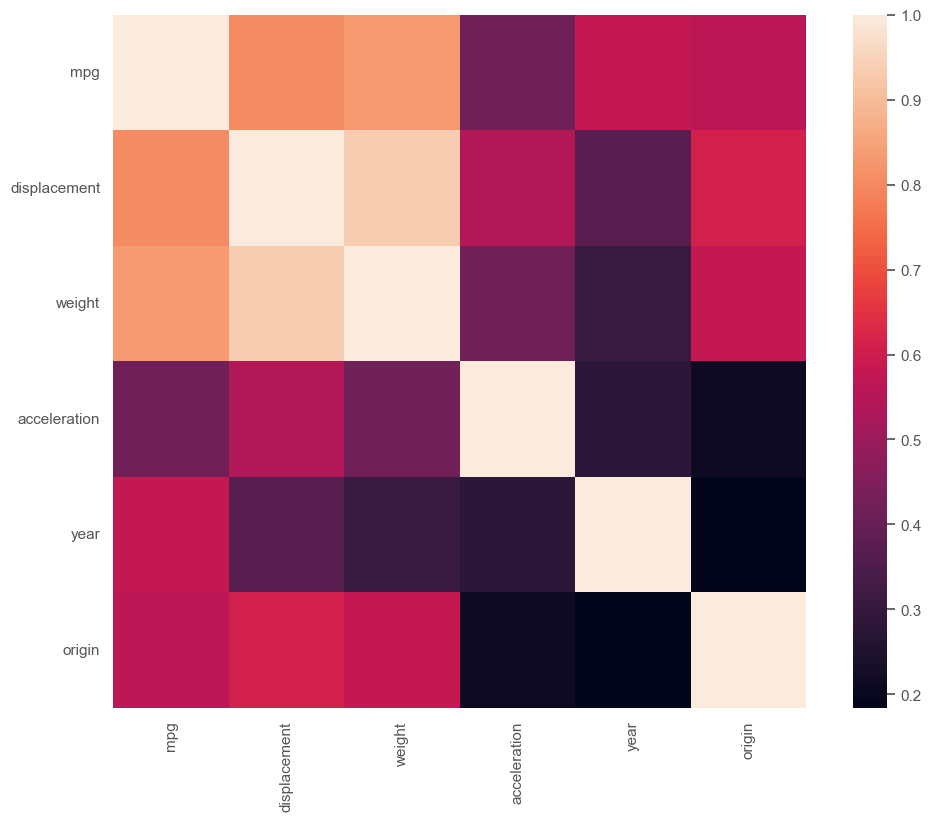

In [21]:
# Heatmap
corr_matrix = Auto.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

## 9(c)

In [22]:


reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', Auto).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     30.81
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          2.49e-112
Time:                        13:16:35   Log-Likelihood:                -891.60
No. Observations:                 397   AIC:                             1989.
Df Residuals:                     294   BIC:                             2400.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -23.6908      4.045     -5.856      0.000     -31.652     -15.729
cylinders[T.4]          6.7537      1.503      4.493      0.000       3.796       9.712
cylinders[T.5]         13.9551      3.207      4.351      0.000       7.643      20.267
cylinders[T.6]          4.9064      1.805      2.719      0.007       1.355       8.458
cylinders[T.8]          7.2620      2.393      3.035      0.003       2.552      11.972
horsepower[T.102.0]    -3.4106      2.801     -1.218      0.224      -8.923       2.102
horsepower[T.103.0]   -12.8425      3.946     -3.255      0.001     -20.608      -5.077
horsepower[T.105.0]     0.3815      1.018      0.375      0.708      -1.622       2.385
horsepower[T.107.0]    -0.1288      2.806     -0.046      0.963      -5.651       5.393
horsepower[T.108.0]    -4.9847      2.828     -1.762      0.079     -10.551       0.582
horsepower[T.110.0]    -1.1738      0.933     -1.258      0.209      -3.010       0.662
horsepower[T.112.0]    -3.7660      1.701     -2.214      0.028      -7.113      -0.419
horsepower[T.113.0]     2.4681      2.795      0.883      0.378      -3.032       7.968
horsepower[T.115.0]    -0.1170      1.408     -0.083      0.934      -2.888       2.654
horsepower[T.116.0]    -3.1586      2.844     -1.110      0.268      -8.757       2.439
horsepower[T.120.0]    -3.6310      1.575     -2.306      0.022      -6.730      -0.532
horsepower[T.122.0]    -2.9493      2.833     -1.041      0.299      -8.526       2.627
horsepower[T.125.0]    -3.4408      1.836     -1.874      0.062      -7.054       0.172
horsepower[T.129.0]    -8.3531      2.280     -3.664      0.000     -12.840      -3.866
horsepower[T.130.0]    -4.6788      1.767     -2.648      0.009      -8.156      -1.201
horsepower[T.132.0]     4.5093      2.856      1.579      0.115      -1.112      10.130
horsepower[T.133.0]    -5.9030      2.823     -2.091      0.037     -11.458      -0.348
horsepower[T.135.0]    -4.7296      2.944     -1.606      0.109     -10.525       1.065
horsepower[T.137.0]    -4.0828      2.975     -1.372      0.171      -9.938       1.772
horsepower[T.138.0]    -6.7128      2.984     -2.249      0.025     -12.586      -0.839
horsepower[T.139.0]    -5.6437      2.293     -2.461      0.014     -10.157      -1.131
horsepower[T.140.0]    -2.9544      1.690     -1.748      0.082      -6.281       0.372
horsepower[T.142.0]    -7.0057      2.975     -2.355      0.019     -12.860      -1.151
horsepower[T.145.0]    -5.1473      1.683     -3.059      0.002      -8.459      -1.835
horsepower[T.148.0]    -3.7131      3.057     -1.215      0.225      -9.729       2.303
horsepower[T.149.0]    -3.9988      2.992     -1.337      0.182      -9.887       1.890
horsepower[T.150.0]    -4.1625      1.484     -2.805      0.005      -7.083      -1.242
hor

In [25]:
reg.pvalues[reg.pvalues < 0.05].sort_values()

year                   9.997250e-36
horsepower[T.48.00]    7.629981e-15
Intercept              1.264886e-08
weight                 1.292109e-07
origin                 1.800230e-06
horsepower[T.65.00]    6.648632e-06
cylinders[T.4]         1.009822e-05
cylinders[T.5]         1.869786e-05
horsepower[T.70.00]    1.313926e-04
horsepower[T.76.00]    1.883109e-04
horsepower[T.52.00]    2.406370e-04
horsepower[T.129.0]    2.948697e-04
horsepower[T.69.00]    4.211125e-04
horsepower[T.58.00]    1.261559e-03
horsepower[T.103.0]    1.268141e-03
horsepower[T.63.00]    1.380738e-03
horsepower[T.64.00]    1.593907e-03
horsepower[T.145.0]    2.427364e-03
acceleration           2.437746e-03
cylinders[T.8]         2.623766e-03
horsepower[T.67.00]    4.978154e-03
horsepower[T.150.0]    5.368093e-03
horsepower[T.180.0]    6.318248e-03
cylinders[T.6]         6.938881e-03
horsepower[T.80.00]    7.623308e-03
horsepower[T.130.0]    8.535065e-03
horsepower[T.66.00]    9.281695e-03
horsepower[T.139.0]    1.442

In [26]:
reg.conf_int()

,0,1
Intercept,-31.652323,-15.729318
cylinders[T.4],3.795510,9.711909
cylinders[T.5],7.643222,20.267074
cylinders[T.6],1.354939,8.457823
cylinders[T.8],2.552295,11.971647
...,...,...
displacement,-0.013545,0.021048
weight,-0.005036,-0.002350
acceleration,-0.510354,-0.110628
year,0.606988,0.800088


### 9c(i)

In [56]:
anova_table = sm.stats.anova_lm(model)
print('\nANOVA results:\n', anova_table)


ANOVA results:
                  df        sum_sq      mean_sq           F         PR(>F)
cylinders       4.0  15494.214538  3873.553634  548.817372  5.502454e-135
horsepower     93.0   4569.412093    49.133463    6.961385   8.235868e-38
displacement    1.0    123.191886   123.191886   17.454217   3.884374e-05
weight          1.0    218.070904   218.070904   30.896978   6.106106e-08
acceleration    1.0    104.558898   104.558898   14.814237   1.455726e-04
year            1.0   1500.209523  1500.209523  212.554446   1.321250e-36
origin          1.0    167.599850   167.599850   23.746079   1.800230e-06
Residual      294.0   2075.052333     7.058001         NaN            NaN


The ANOVA results can be used to determine if there is a relationship between the predictors and the response. as for the p-value in the ANOVA table. A p-value less than the significance alpha level (i.e., 0.05) suggests that at least one predictor variable has a statistically significant relationship with the response.

(ii) In the summary table, as for the "P>|t|" column. A p-value less than the significance alpha level indicates that the corresponding predictor has a statistically significant relationship with the response.

(iii) The coefficient for the year variable indicates the change in the response variable (mpg) for a one-unit change in the year variable, holding all other variables constant. For example, if the coefficient for year is 0.5, it suggests that for each additional year, the mpg is expected to increase by 0.5 units, assuming all other variables are held constant.

## 9(d)

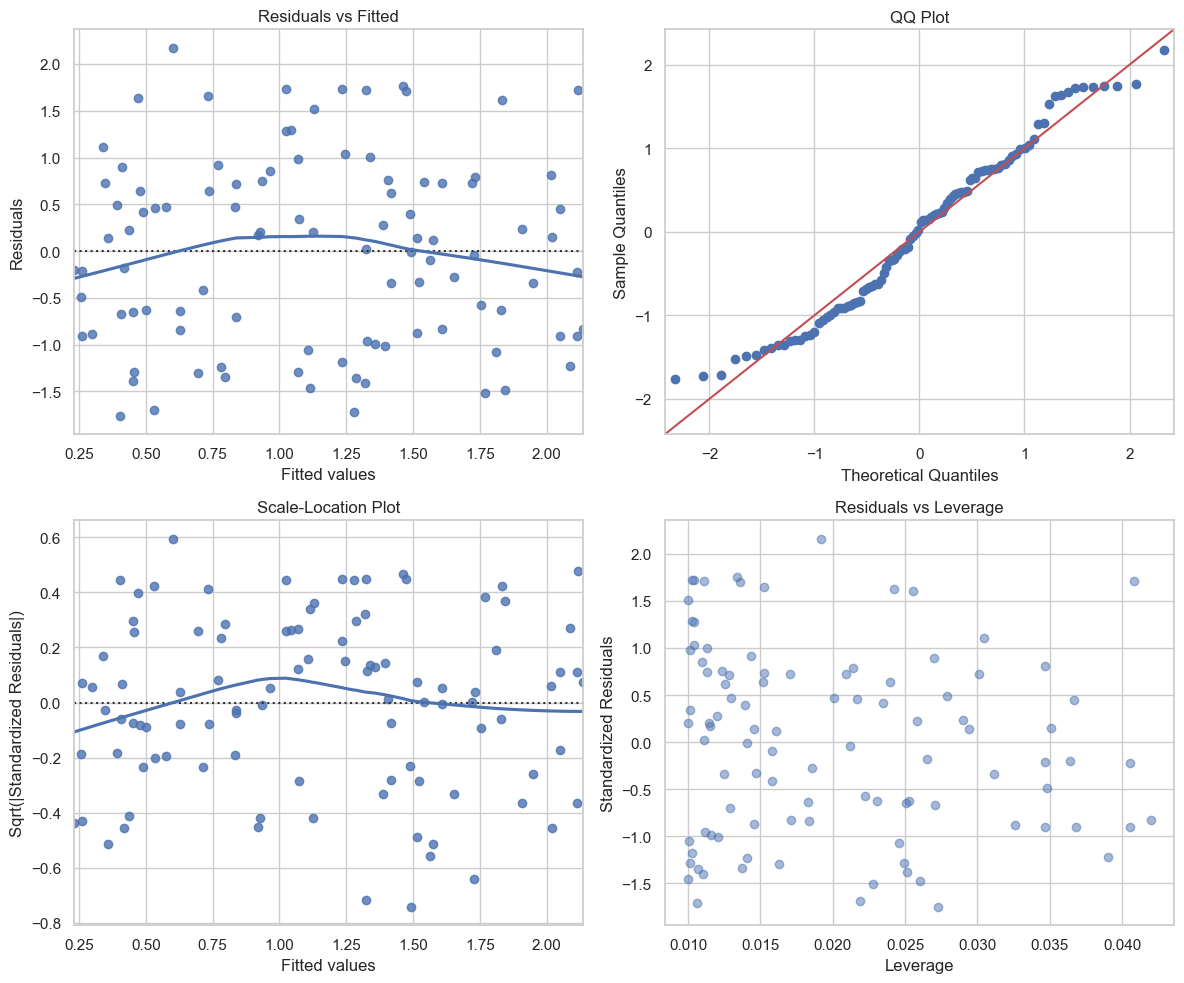

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Assuming you already have a fitted model named 'model_fit'

# Residuals vs Fitted plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.residplot(x=model_fit.fittedvalues, y=model_fit.resid, lowess=True, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(model_fit.resid, fit=True, line="45", ax=ax[0, 1])
ax[0, 1].set_title('QQ Plot')

# Scale-Location plot
sns.residplot(x=model_fit.fittedvalues, y=np.sqrt(np.abs(model_fit.get_influence().resid_studentized_internal)), lowess=True, ax=ax[1, 0])
ax[1, 0].set_title('Scale-Location Plot')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|Standardized Residuals|)')

# Residuals vs Leverage plot
sns.regplot(x=model_fit.get_influence().hat_matrix_diag, y=model_fit.resid_pearson, fit_reg=False, ax=ax[1, 1], scatter_kws={"alpha": 0.5})
ax[1, 1].set_title('Residuals vs Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()


In the residual plots the fit does not appear accurate because there is a obvious curve pattern to the residual plots. From the leverage plot, point 14 seems to have high leverage but not a high magnitude residual.

## 9(e)

In [32]:
model3a = smf.ols(formula='mpg ~ displacement*weight + year', data=Auto) 
print(model3a.fit().summary())
model3b = smf.ols(formula='mpg ~ displacement + weight + origin:year', data=Auto) 
print(model3b.fit().summary())
model3c = smf.ols(formula='mpg ~ displacement + acceleration*weight + year + origin', data=Auto) 
print(model3c.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     569.1
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          9.21e-162
Time:                        13:25:58   Log-Likelihood:                -998.90
No. Observations:                 397   AIC:                             2008.
Df Residuals:                     392   BIC:                             2028.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.5766    

Using the highest correlated pairs from the correlation matrix in part b and we used them to be interaction effects. From the tables above with the p-values, it can be assumed that there is significant interaction between displacement and weight, but the interaction between cyliders and displacement is not significant.

## 9(f)

In [35]:
model3d = smf.ols(formula='mpg ~ displacement + np.log(weight) + year', data=Auto) 
print(model3d.fit().summary())
model3e = smf.ols(formula='mpg ~ displacement + np.sqrt(weight) + year + origin', data=Auto) 
print(model3e.fit().summary())
# raw polynomial terms
model3fa = smf.ols(formula='mpg ~ displacement + weight + I(weight**2)', data=Auto) 
print(model3fa.fit().summary())
# orthogonal polynomial terms
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

Auto['weight1'] = poly(Auto.weight, 2)[:,0]
Auto['weight2'] = poly(Auto.weight, 2)[:,1]

model3fb = smf.ols(formula='mpg ~ displacement + weight1 + weight2', data=Auto) 
print(model3fb.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     683.8
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.52e-155
Time:                        13:28:08   Log-Likelihood:                -1016.8
No. Observations:                 397   AIC:                             2042.
Df Residuals:                     393   BIC:                             2058.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        140.0304     10.904     12.

C:\Users\nihar\AppData\Local\Temp\ipykernel_34764\2412195312.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))
C:\Users\nihar\AppData\Local\Temp\ipykernel_34764\2412195312.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


Log transformation: The log transformation often helps to stabilize variance and make the relationship more linear. If the relationship between weight and mpg is nonlinear and the residuals exhibit heteroscedasticity, the log transformation might be helpful.
Square root transformation: The square root transformation can help to mitigate the effect of extreme values and make the relationship more linear. It is useful when the relationship between weight and mpg is concave.
Square transformation: The square transformation can help capture a quadratic relationship between the variables. It is useful when there is a curvilinear relationship between weight and mpg.

## 10(a)

In [38]:

from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

C:\Users\nihar\AppData\Local\Temp\ipykernel_34764\4261178975.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [39]:
carseats = get_rdataset('Carseats', 'ISLR').data

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
carseats.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [41]:
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [42]:
carseats.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [43]:
# Fit multiple regession model to predict sales using price, Urban and US
model1 = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats) 
print(model1.fit().summary())
print('RSE = %.3f' %np.sqrt(model1.fit().scale))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        13:29:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## 10(b)

This represents the estimated Sales when all other predictors (Price, Urban, US) are zero. However, since the variables Urban and US are binary (0 or 1), the interpretation of the intercept might not be meaningful in this context.

Price: The coefficient for Price represents the estimated change in Sales for a one-unit increase in Price, holding all other variables constant. For example, if the coefficient for Price is -0.05, it suggests that for every one-unit increase in Price, Sales are estimated to decrease by 0.05 units, holding Urban and US constant.

Urban: The coefficient for Urban is interpreted differently because it's a binary variable (0 or 1). If Urban is coded as 1 for urban locations and 0 for non-urban locations, the coefficient represents the estimated difference in Sales between urban and non-urban locations, holding Price and US constant.

US: Similarly, the coefficient for US is also interpreted as the estimated difference in Sales between US and non-US locations, holding Price and Urban constant.

## 10(c)

The multiple regression model to predict Sales using Price, Urban, and US variables can be written in equation form as:

Sales = β0 + β1 * Price + β2 * Urban + β3 * US + ϵ
β0 is the intercept term.

β1 is the coefficient for Price, representing the effect of a one-unit change in Price on Sales, holding Urban and US constant.

β2 is the coefficient for Urban, representing the difference in Sales between urban and non-urban locations, holding Price and US constant.

β3 is the coefficient for US, representing the difference in Sales between US and non-US locations, holding Price and Urban constant.

ϵ is the error term.

## 10(d)

Price and USYes are two predictors that you can reject the null hypothesis. FOr the p-values for the intercept of Price and USYes are all almost zero, which give strong evidence to reject the null Hypothesis that: βj = 0 for these two predictors.

## 10(e)

In [49]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula='Sales ~ Price + US', data=carseats) 
print(model2.fit().summary())
print('RSE = %.3f' %np.sqrt(model2.fit().scale))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           2.66e-24
Time:                        13:32:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## 10(f)

The models in Part 1 and Part 5 both fit the data about equally well, with almsot identical R2 values of 0.235 for model2 and 0.234 for model 1. In addition, when RSE values model 1 has a RSE = 2.472 and model 2 has a RSE = 2.469.

## 10(g)

In [52]:
model2.fit().conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


The 95% confidence intervals for the coefficients in the model provide a range of values within which we can be 95% confident that the true population coefficient lies. Here's how you can interpret the confidence intervals for the coefficients in the model from (e), which includes only the US and Price predictors:
Intercept: The 95% confidence interval for the intercept is [11.79032, 14.271265]. This means that we are 95% confident that the true value of the intercept falls within this range.

US[T.Yes]: The 95% confidence interval for the US coefficient (US[T.Yes]) is [0.69152, 1.707766]. This means that we are 95% confident that the true effect of being in the US market (compared to non-US) on Sales falls within this range.

Price: The 95% confidence interval for the Price coefficient is [-0.06476, -0.044195]. This means that we are 95% confident that the true effect of a one-unit increase in Price on Sales falls within this range.

## 10(h)

In [54]:
model2_fit = model2.fit()
# fitted values
model2_fitted_y = model2_fit.fittedvalues
# normalized residuals
model2_norm_residuals = model2_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model2_norm_residuals_abs_sqrt = np.sqrt(np.abs(model2_norm_residuals))
# leverage, from statsmodels internals
model2_leverage = model2_fit.get_influence().hat_matrix_diag


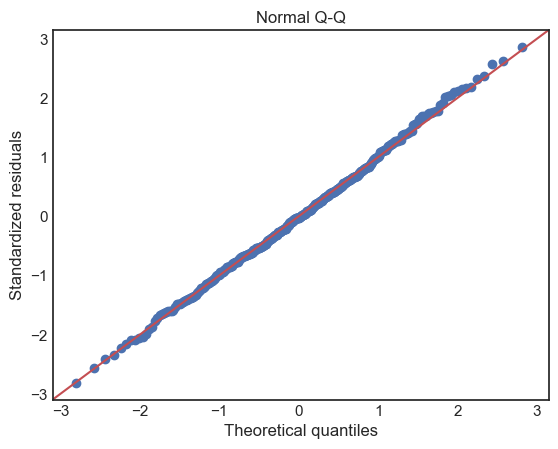

In [58]:
 #normal Q-Q
plot1 = sm.qqplot(model2_norm_residuals, fit=True, line='45')
plot1.axes[0].set_title('Normal Q-Q')
plot1.axes[0].set_xlabel('Theoretical quantiles')
plot1.axes[0].set_ylabel('Standardized residuals');

Text(0, 0.5, 'Residuals')

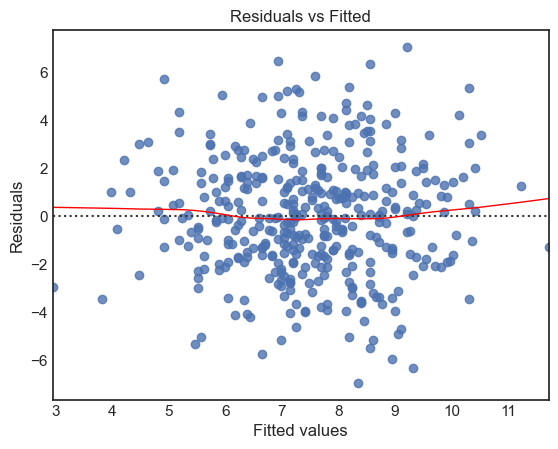

In [59]:
#residuals vs. fitted values 
plot2 = plt.figure(1)
sns.residplot(x=model2_fitted_y, y=carseats['Sales'], lowess=True, line_kws={'color':'red', 'lw':1})
plot2.axes[0].set_title('Residuals vs Fitted')
plot2.axes[0].set_xlabel('Fitted values')
plot2.axes[0].set_ylabel('Residuals')

This plot helps us check for the assumption of homoscedasticity (constant variance of residuals). Ideally, we want to see a random scatter of points around the horizontal line at y=0. If there is a clear pattern (e.g., a cone shape, a funnel shape, or any other systematic pattern), it indicates that the homoscedasticity assumption may be violated. In this case, the plot shows a random scatter of points, which is a good sign for the homoscedasticity assumption.

## 12(a)

In [60]:
np.random.seed(0)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)
# Fit Y onto X without intercept
beta_yx = np.sum(x * y) / np.sum(x**2)
# Fit X onto Y without intercept
beta_xy = np.sum(x * y) / np.sum(y**2)


In [61]:
#check coefficients are equal or not
are_equal = np.isclose(beta_yx, beta_xy)
are_equal

False

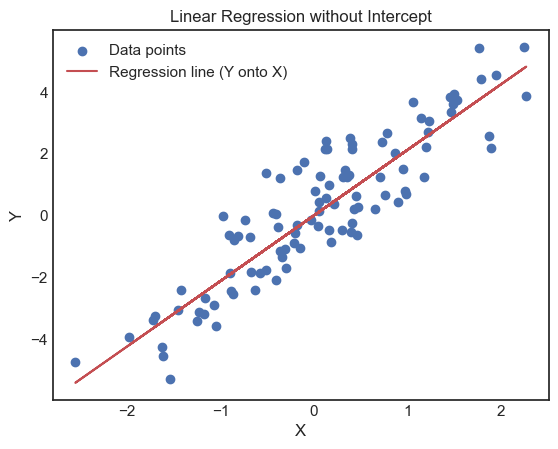

In [62]:
# Plot the data
plt.scatter(x, y, label="Data points")
plt.plot(x, beta_yx * x, color='r', label="Regression line (Y onto X)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression without Intercept")
plt.legend()
plt.show()

## 12(b)

In [63]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100)
Y = 2 * X + np.random.randn(100)

# Fit Y onto X without intercept
lm_y_x = sm.OLS(Y, X).fit()
beta_hat_y_x = lm_y_x.params[0]

In [64]:
# Fit X onto Y without intercept
lm_x_y = sm.OLS(X, Y).fit()
beta_hat_x_y = lm_x_y.params[0]

In [65]:
#check coefficients are equal or not
equal = np.isclose(beta_hat_y_x, beta_hat_x_y)
equal

False

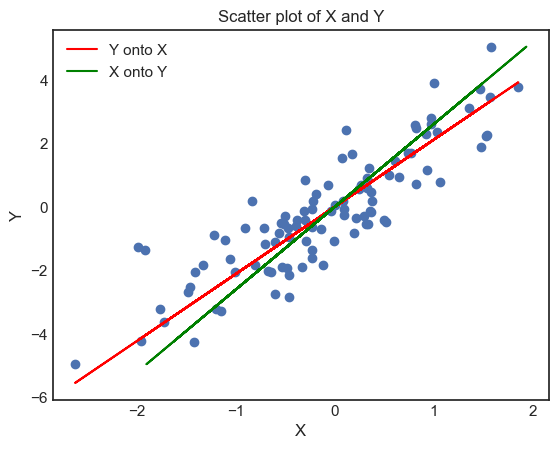

In [66]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')
# Add regression lines
plt.plot(X, beta_yx*X, color='red', label='Y onto X')
plt.plot(beta_xy*Y, Y, color='green', label='X onto Y')
plt.legend()

plt.show()

## 12(c)

In [67]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 100
# Generate random data points for X and Y with equal standard deviations
X = np.random.normal(loc=0, scale=1, size=n)
Y = np.random.normal(loc=0, scale=1, size=n)
# Calculate coefficient estimate for the regression of Y onto X
beta_yx = np.sum(X*Y) / np.sum(X*X)
# Calculate coefficient estimate for the regression of X onto Y
beta_xy = np.sum(X*Y) / np.sum(Y*Y)



In [68]:
#check coefficients are equal or not
eq = np.isclose(beta_yx, beta_xy)
eq

False

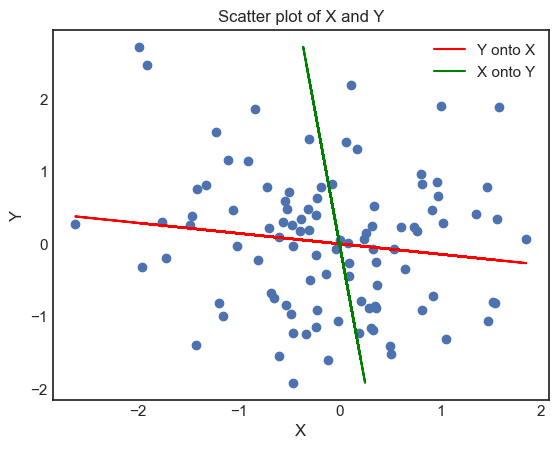

In [69]:
# Plot the data points
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')
# Add regression lines
plt.plot(X, beta_yx*X, color='red', label='Y onto X')
plt.plot(beta_xy*Y, Y, color='green', label='X onto Y')
plt.legend()

plt.show()